<Axes: xlabel='x'>

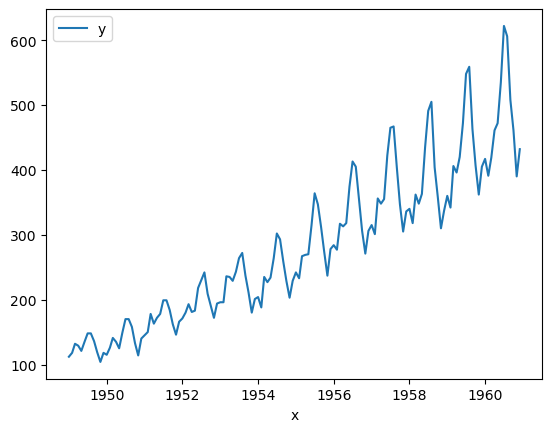

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('AirPassengers.csv')
df.rename({'Passengers': 'y', 'Month': 'x'}, axis=1, inplace=True)
df['x'] = pd.to_datetime(df['x']).dt.date
df.set_index('x', inplace=True)

df.plot()


In [2]:
df

,Month,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [78]:
from sklearn.model_selection import train_test_split

def split_sequence(y, seqlen):

    xs, ys = [], []
    for i in range(len(y)):
        x_, y_ = y[i:i+seqlen], y[i+seqlen]
        xs.append(x_)
        ys.append(y_)

        if i+seqlen+1 == len(y):
            break

    return np.array(xs), np.array(ys)

seqlen = 20
x, y = split_sequence(df['y'].values, seqlen)

x = x.reshape(-1, seqlen, 1)
y = y.reshape(-1, 1)

In [79]:
y

array([[158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
       [229],
       [242],
       [233],
       [267],
       [269],
       [270],
       [315],
       [364],
       [347],
       [312],
       [274],
       [237],
       [278],
       [284],
       [277],
       [317],
       [313],
       [318],
       [374],
       [413],
      

In [80]:
from sklearn.model_selection import train_test_split


train_valid_x, test_x, train_valid_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=False)
train_x, val_x, train_y, val_y = train_test_split(train_valid_x, train_valid_y, test_size=0.2, shuffle=False)

In [82]:
import os, sys
sys.path.append(os.path.realpath("../../"))
from models.torch.rnn import RNN

hidden_size = 64
model = RNN(hidden_size)

In [96]:
import torch
import torch.nn as nn


hidden_size = 64
model = RNN(hidden_size)



(tensor([[[ 1.0000,  0.8907, -0.9976,  ..., -1.0000,  1.0000, -0.9996],
          [ 1.0000,  0.8311, -0.9966,  ..., -1.0000,  1.0000, -0.9986],
          [ 1.0000,  0.8594, -0.9985,  ..., -1.0000,  1.0000, -0.9995],
          ...,
          [ 1.0000,  0.9093, -0.9994,  ..., -1.0000,  1.0000, -0.9999],
          [ 1.0000,  0.9491, -0.9998,  ..., -1.0000,  1.0000, -1.0000],
          [ 1.0000,  0.9502, -0.9998,  ..., -1.0000,  1.0000, -1.0000]],
 
         [[ 1.0000,  0.9063, -0.9983,  ..., -1.0000,  1.0000, -0.9997],
          [ 1.0000,  0.8819, -0.9985,  ..., -1.0000,  1.0000, -0.9995],
          [ 1.0000,  0.8508, -0.9981,  ..., -1.0000,  1.0000, -0.9994],
          ...,
          [ 1.0000,  0.9491, -0.9998,  ..., -1.0000,  1.0000, -1.0000],
          [ 1.0000,  0.9502, -0.9998,  ..., -1.0000,  1.0000, -1.0000],
          [ 1.0000,  0.9317, -0.9997,  ..., -1.0000,  1.0000, -0.9999]],
 
         [[ 1.0000,  0.9349, -0.9993,  ..., -1.0000,  1.0000, -0.9999],
          [ 1.0000,  0.8740,

AttributeError: 'numpy.ndarray' object has no attribute 'dim'